In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
NDVI = pd.read_excel("./Used Datasets/NDvi2011-2020.xlsx")
PET = pd.read_excel("./Used Datasets/pet_2010_2020_Scale0.1.xlsx", infer_datetime_format=True)
SolRad = pd.read_excel("./Used Datasets/Srad2010-20.xlsx")
AET = pd.read_excel("./Used Datasets/aet_2010_2020_Scale0.1.xlsx")
Tmin = pd.read_excel("./Used Datasets/tmin.xlsx")
Tmax = pd.read_excel("./Used Datasets/tmax.xlsx")
co2 = pd.read_csv("./Used Datasets/co2_trend_gl_re.txt", delim_whitespace=True)

In [32]:
PAR = np.array(SolRad.values[8 :, 1], dtype=int)/20
NdviArray = np.array(NDVI.values[: -10, 1], dtype=float)
Tavg = (np.array(Tmin.values[8 :, 1], dtype=float) + np.array(Tmax.values[8 :, 1], dtype=float))/20
# Tsday_act = np.array(Tsday.values[:, 1], dtype=float)*0.02 - 273.15
CO2 = co2.values[:,3]
co2_day=co2.values[:,2]
co2_month=co2.values[:,1]

W = 0.5 + (np.array(AET.values[17 :,1], dtype=int)/np.array(PET.values[17 :, 1], dtype=int))
print(NdviArray)

[0.    0.    0.    0.02  0.03  0.06  0.41  0.56  0.46  0.36  0.39  0.26
 0.32  0.27  0.29  0.38  0.32  0.41  0.29  0.25  0.29  0.24  0.24  0.2
 0.056 0.072 0.17  0.03  0.03  0.34  0.27  0.38  0.48  0.4   0.32  0.24
 0.34  0.43  0.44  0.48  0.37  0.27  0.21  0.2   0.25  0.28  0.24  0.24
 0.112 0.144 0.032 0.096 0.304 0.428 0.52  0.548 0.576 0.532 0.496 0.34
 0.304 0.32  0.328 0.312 0.392 0.392 0.524 0.476 0.34  0.32  0.316 0.26
 0.232 0.104 0.024 0.012 0.052 0.292 0.204 0.504 0.424 0.36  0.216 0.252
 0.276 0.224 0.392 0.364 0.38  0.328 0.228 0.292 0.216 0.436 0.208 0.124
 0.116 0.16  0.1   0.128 0.18  0.284 0.304 0.348 0.392 0.368 0.26  0.244
 0.272 0.3   0.368 0.496 0.42  0.292 0.284 0.22  0.268 0.208 0.276 0.256
 0.152 0.12  0.12  0.096 0.056 0.24  0.428 0.42  0.32  0.368 0.324 0.272
 0.28  0.448 0.46  0.348 0.416 0.356 0.324 0.292 0.332 0.304 0.256 0.26
 0.192 0.228 0.216 0.116 0.172 0.156 0.52  0.532 0.536 0.512 0.276 0.228
 0.24  0.356 0.376 0.412 0.468 0.324 0.316 0.284 0.28  0.28

In [6]:
W_new = np.zeros(W.size*2, dtype=float)
Tavg_new = np.zeros(Tavg.size*2, dtype=float)
PAR_new = np.zeros(PAR.size*2, dtype=float)
for i in range(Tavg.size):
    W_new[2*i] = W[i]
    Tavg_new[2*i] = Tavg[i]
    PAR_new[i*2] = PAR[i]
    if 2*(i+1)<Tavg_new.size:
        Tavg_new[2*i+1] = (Tavg[i]+Tavg[i+1])/2
        W_new[2*i+1] = (W[i]+W[i+1])/2
        PAR_new[2*i+1] = (PAR[i]+PAR[i+1])/2
Tavg_new[-1] = (Tavg_new[-24]+Tavg_new[-48])/2
W_new[-1] = (W_new[-24]+W_new[-48])/2
PAR_new[-1] = (PAR_new[-24]+PAR_new[-48])/2

In [62]:
CO2_avg = np.zeros(214, dtype=float)
sum=0
y=0
for c in range(CO2.size):
    if(co2_day[c]%31!=0):
        if(co2_month[c]!=2):
            sum+=CO2[c]
            if(co2_day[c]%15==0 and c!=0 ):
                CO2_avg[y]=sum/15
                sum=0
                y=y+1
        elif(co2_day[c]%29!=0):
            sum+=CO2[c]
            if(co2_day[c]%14==0  ):
                CO2_avg[y]=sum/14
                sum=0
                y=y+1
CO2_final=CO2_avg[:-8]               
            

W_new = np.zeros(W.size*2, dtype=float)
Tavg_new=np.zeros(Tavg.size*2, dtype=float)
PAR_new = np.zeros(PAR.size*2, dtype=float)
for i in range(Tavg.size):
    Tavg_new[2*i]=Tavg[i]
    Tavg_new[2*i+1]=Tavg[i]
    W_new[2*i] = W[i]
    W_new[2*i+1] = W[i]
    PAR_new[i*2] = PAR[i]
    PAR_new[i*2+1] = PAR[i]

In [8]:
Topt = Tavg_new[-6]
Tmon = Tavg_new
T1 = 0.8 + 0.02*Topt - 0.0005*Topt**2
T2 = 1.185/((1+np.exp(0.2*(Topt-10-Tmon)))*(1+np.exp(0.3*(-Topt-10+Tmon))))
LUE = 2.5*T1*T2*W_new
NPP = NdviArray*PAR_new*LUE
CO2_trend = co2.values[:, 4]

In [39]:
df_pr = NDVI.copy()
df_pr = df_pr.drop(index=df_pr.index[-10 :], columns='NDVI')
df_pr['NPP'] = NPP
df_pr.DateTime = pd.to_datetime(df_pr.DateTime, yearfirst=True)
df_pr = df_pr.set_index("DateTime")
df_pr = df_pr.reset_index()
df_pr.columns = ['ds','y']
train_data_pr = df_pr.iloc[:len(df_pr)]
print(train_data_pr)

            ds           y
0   2011-06-08    0.000000
1   2011-06-22    0.000000
2   2011-07-08    0.000000
3   2011-07-22    5.386902
4   2011-08-08    7.841710
..         ...         ...
201 2019-10-22  146.569733
202 2019-11-08   83.047250
203 2019-11-22   55.304357
204 2019-12-08   45.609955
205 2019-12-22   34.779953

[206 rows x 2 columns]


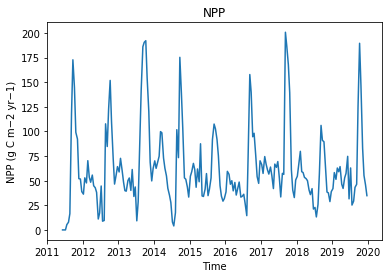

In [65]:
fig = plt.figure(1)

ax1 = fig.add_subplot(111)
ax1.plot(train_data_pr['ds'], NPP, label="Actual data")
ax1.set_ylabel('NPP (g C m−2 yr−1)')
ax1.set_xlabel('Time')
ax1.set_title('NPP')
fig.show()
fig.savefig('Npp.png', dpi=300)


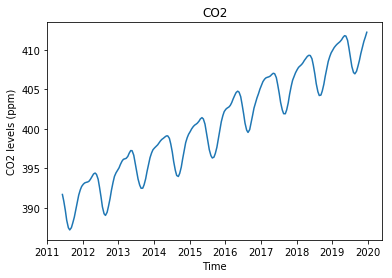

In [66]:
fig2 = plt.figure(2)

ax2 = fig2.add_subplot(111)
ax2.plot(train_data_pr['ds'], CO2_final, label="Actual data")
ax2.set_ylabel('CO2 levels (ppm)')
ax2.set_xlabel('Time')
ax2.set_title('CO2')
fig2.show()
fig2.savefig('Co2.png', dpi=300)


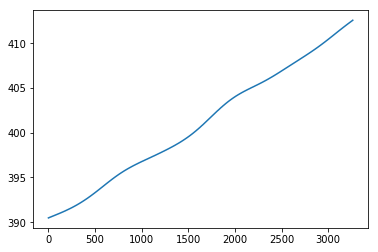

In [53]:
plt.plot(CO2_trend)

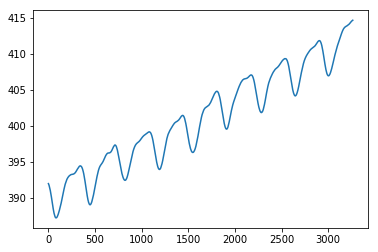

In [58]:
plt.plot(CO2)